# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [2]:
df = pd.read_csv('../data/wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
X = df.drop('Class', axis=1)

In [9]:
X.shape

(178, 13)

In [10]:
import seaborn as sns

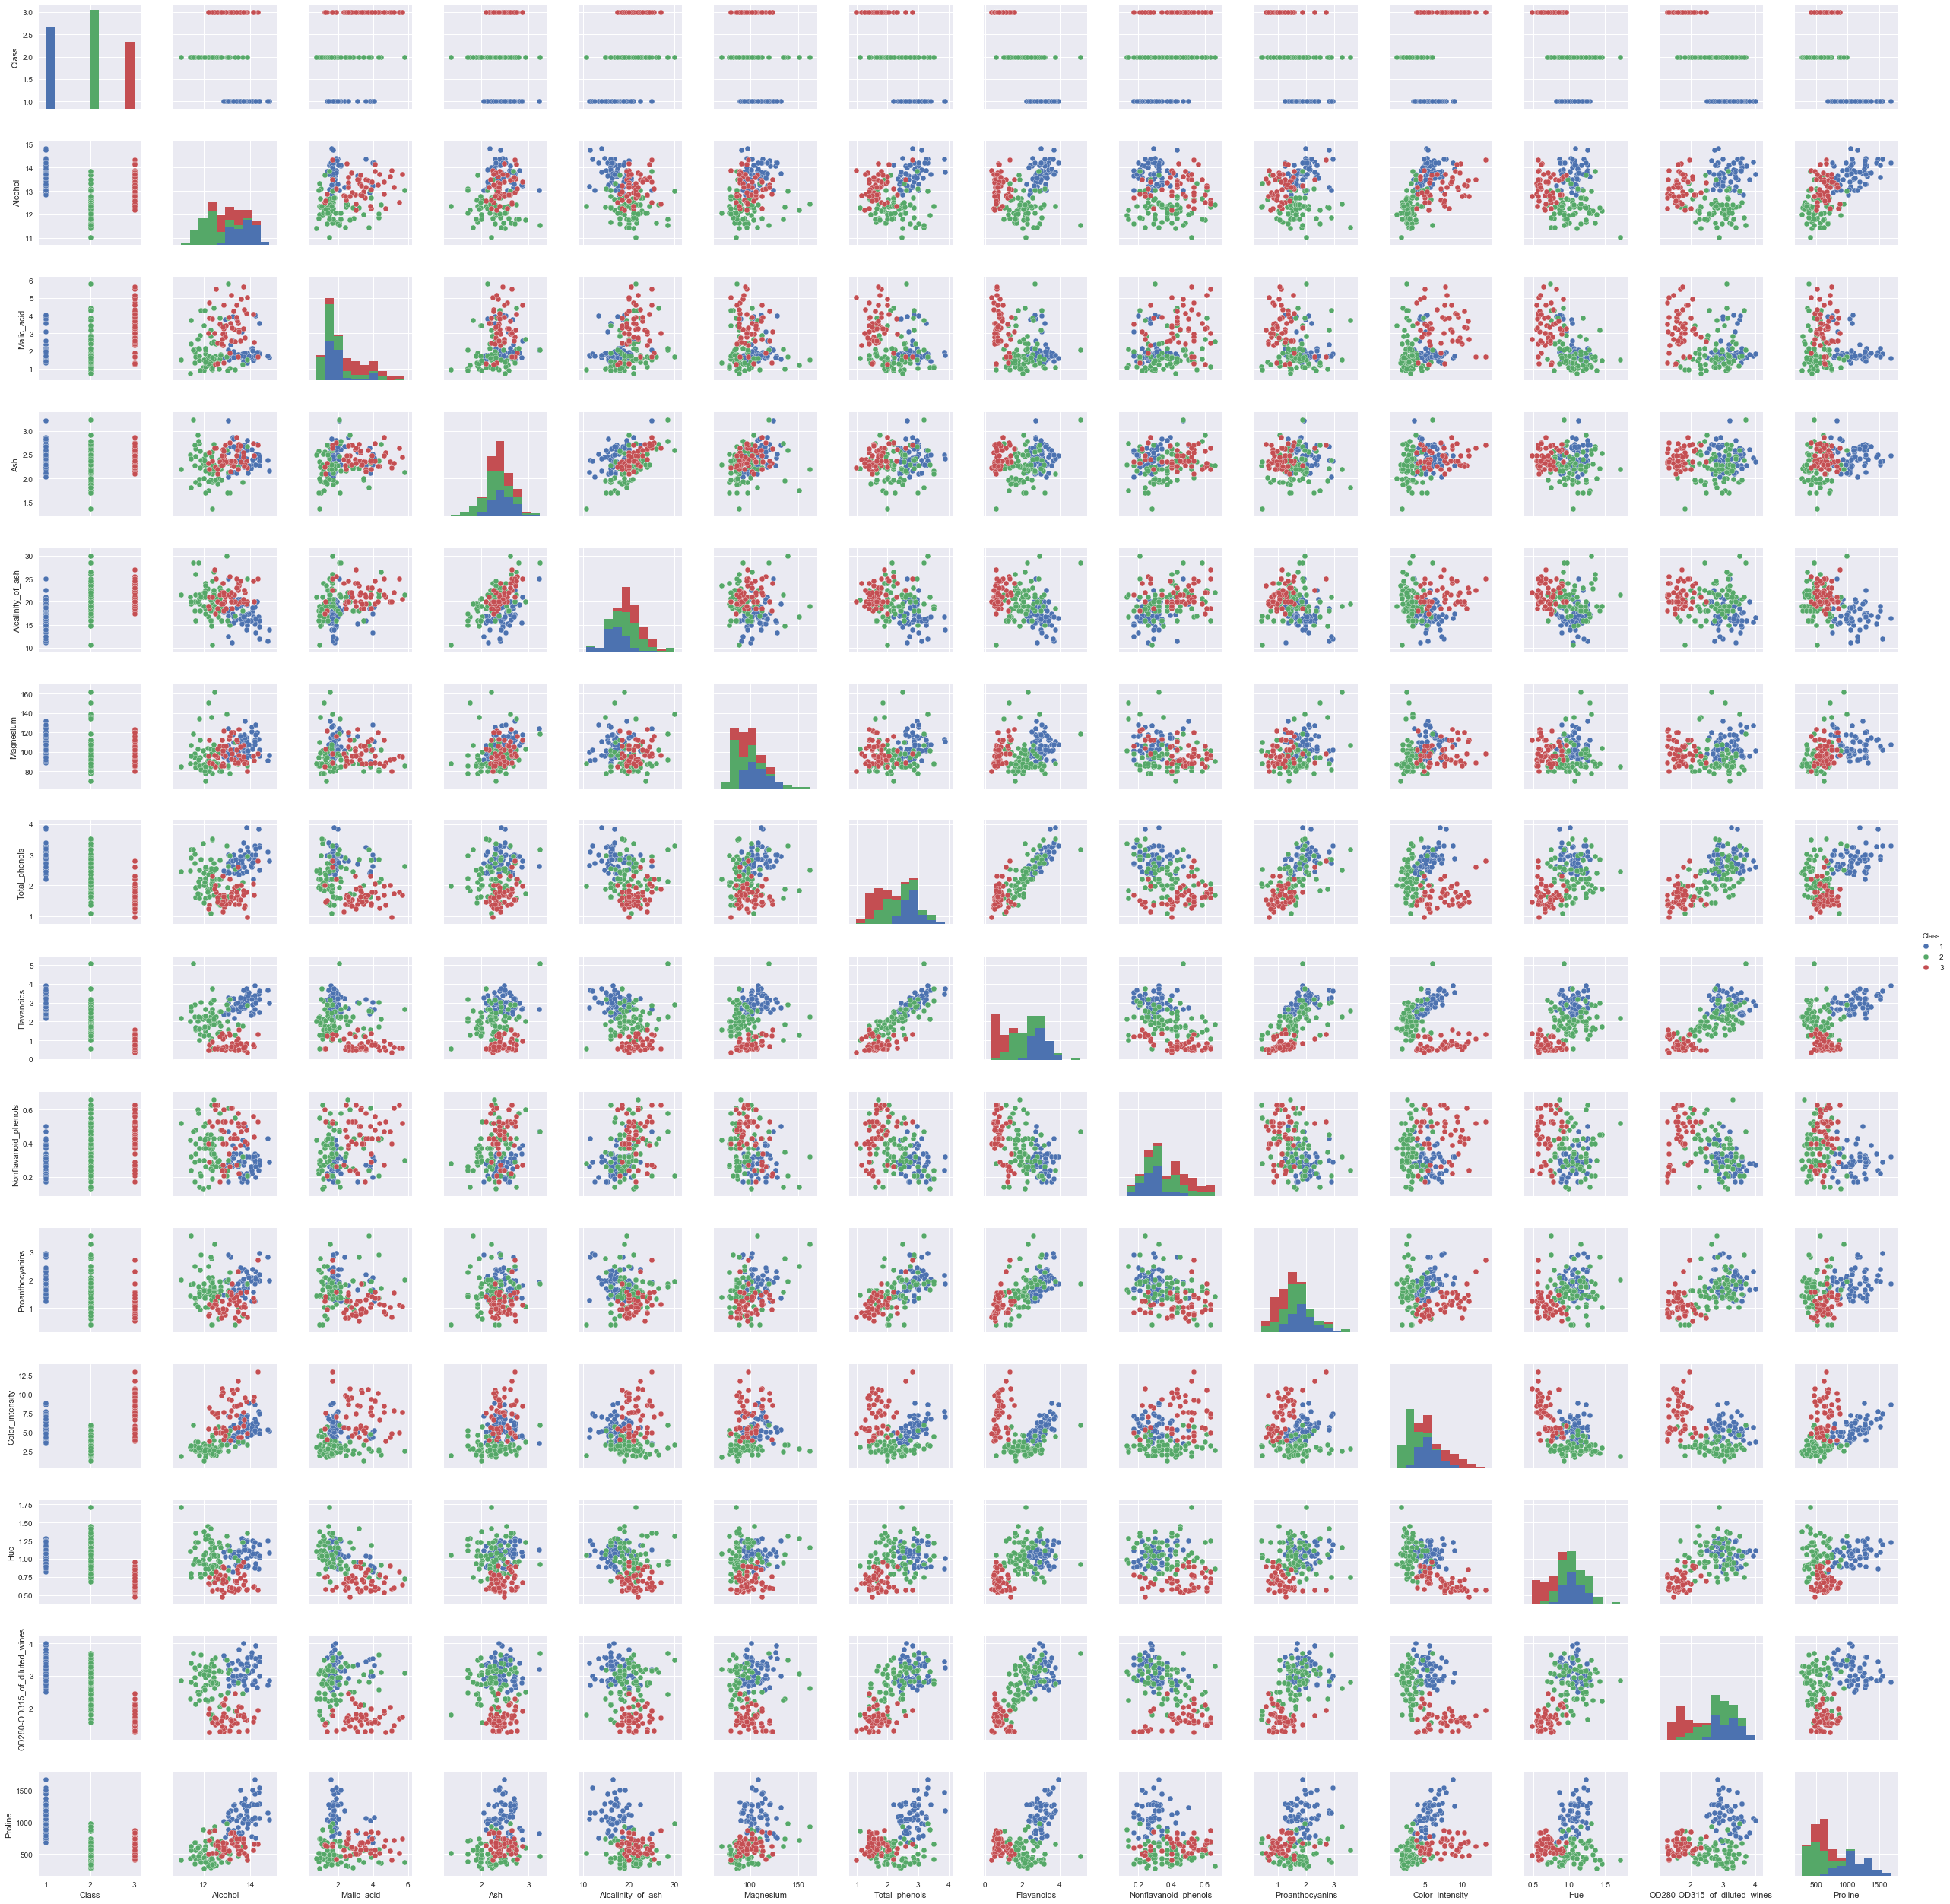

In [11]:
sns.pairplot(df, hue='Class')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
Xsc = sc.fit_transform(X)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

Using TensorFlow backend.


In [16]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s - loss: 0.4474 - acc: 0.8592 - val_loss: 2.8807e-04 - val_acc: 1.0000
Epoch 2/10
142/142 [==============================] - 0s - loss: 0.1873 - acc: 0.9507 - val_loss: 4.4473e-04 - val_acc: 1.0000
Epoch 3/10
142/142 [==============================] - 0s - loss: 0.1164 - acc: 0.9577 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 4/10
142/142 [==============================] - 0s - loss: 0.0631 - acc: 0.9718 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 5/10
142/142 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 8.8281e-04 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 7/10
142/142 [==============================] - 0s - loss: 0.0511 - acc: 0.9789 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 8/10
142/142 [==============================] - 0s - loss: 4.2356e-04 - acc:

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 0.5808 - acc: 0.8034     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.1976 - acc: 0.9607     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.1066 - acc: 0.9831     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.0945 - acc: 0.9775     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.0345 - acc: 1.0000     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.0401 - acc: 0.9944     
Epoch 7/20
178/178 [==============================] - 0s - loss: 0.0738 - acc: 0.9775     
Epoch 8/20
178/178 [==============================] - 0s - loss: 0.0218 - acc: 0.9944     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.0896 - acc: 0.9831     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.0262 - acc: 0.9888     
Epoch 11/20
178/178 [==============================] - 0s - loss: 0.0367 - acc: 0.9944   

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [19]:
inp = model.layers[0].input
out = model.layers[2].output

In [20]:
features_function = K.function([inp], [out])

In [21]:
features = features_function([Xsc])[0]

In [22]:
features.shape

(178, 2)

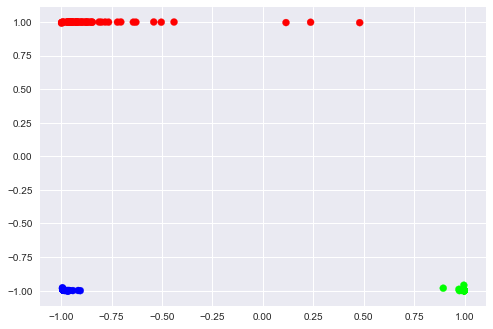

In [23]:
plt.scatter(features[:, 0], features[:, 1], c=y_cat)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [24]:
from keras.layers import Input
from keras.models import Model

In [25]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 0s - loss: 0.5753 - acc: 0.7697     
Epoch 2/20
178/178 [==============================] - 0s - loss: 0.1880 - acc: 0.9607     
Epoch 3/20
178/178 [==============================] - 0s - loss: 0.1042 - acc: 0.9775     
Epoch 4/20
178/178 [==============================] - 0s - loss: 0.0600 - acc: 0.9888     
Epoch 5/20
178/178 [==============================] - 0s - loss: 0.1137 - acc: 0.9663     
Epoch 6/20
178/178 [==============================] - 0s - loss: 0.0395 - acc: 0.9888     
Epoch 7/20
178/178 [==============================] - ETA: 0s - loss: 0.0221 - acc: 1.000 - 0s - loss: 0.0118 - acc: 1.0000     
Epoch 8/20
178/178 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s - loss: 0.0062 - acc: 1.0000     
Epoch 9/20
178/178 [==============================] - 0s - loss: 0.0036 - acc: 1.0000     
Epoch 10/20
178/178 [==============================] - 0s - loss: 0.0022 - acc: 1.0000     
Epoch 11/20
1

In [26]:
features_function = K.function([inputs], [second_to_last])

In [27]:
features = features_function([Xsc])[0]

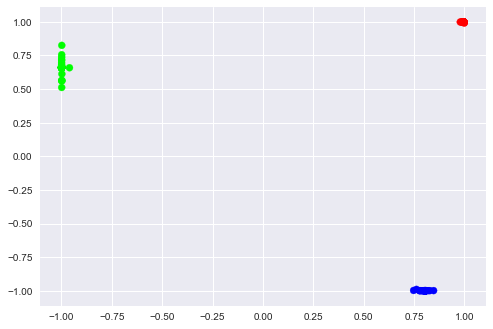

In [28]:
plt.scatter(features[:, 0], features[:, 1], c=y_cat)

## Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [30]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [31]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [32]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [35]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.46767, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.8070 - acc: 0.5887 - val_loss: 0.4677 - val_acc: 0.9074
Epoch 2/20
Epoch 00001: val_loss improved from 0.46767 to 0.28999, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.3588 - acc: 0.9597 - val_loss: 0.2900 - val_acc: 0.9630
Epoch 3/20
Epoch 00002: val_loss improved from 0.28999 to 0.20368, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.2436 - acc: 0.9516 - val_loss: 0.2037 - val_acc: 0.9630
Epoch 4/20
Epoch 00003: val_loss improved from 0.20368 to 0.19503, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.1471 - acc: 1.0000 - val_loss: 0.1950 - val_acc: 0.9630
Epoch 5/20
Epoch 00004: val_loss improved from 0.19503 to 0.16749, saving model to /tmp/udemy/weights.hdf5
0s - loss: 0.1062 - acc: 0.9919 - val_loss: 0.1675 - val_acc: 0.9630
Epoch 6/20
Epoch 00005: val_loss improved from 0.16749 to 0.14405, saving model

Run Tensorboard with the command:

    tensorboard --logdir <the-folder-you-chose-in-the-callback>